## 實作KNN (from Scratch), 決定test_x屬於那個類別?

 


In [1]:
import numpy as np 
from math import log
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))


def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

## Preparing the Data

In [2]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])



In [3]:
df = pd.DataFrame(X, columns=['weight', 'length', 'target'])
df

,weight,length,target
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


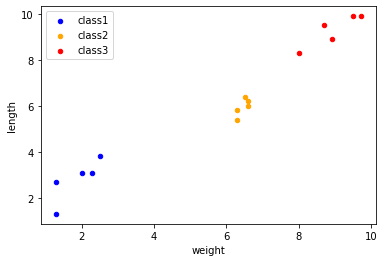

In [4]:
ax = df[df['target'] == 0].plot.scatter(x='weight', y='length', c='blue', label='class1')
df[df['target'] == 1].plot.scatter(x='weight', y='length', c='orange', label='class2', ax=ax)
df[df['target'] == 2].plot.scatter(x='weight', y='length', c='red', label='class3', ax=ax)

In [5]:
#test_x=[[2.0, 3.1, 0]]
#test_x

In [6]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 2].values
x


array([[6.6, 6.2],
       [9.7, 9.9],
       [8. , 8.3],
       [6.3, 5.4],
       [1.3, 2.7],
       [2.3, 3.1],
       [6.6, 6. ],
       [6.5, 6.4],
       [6.3, 5.8],
       [9.5, 9.9],
       [8.9, 8.9],
       [8.7, 9.5],
       [2.5, 3.8],
       [2. , 3.1],
       [1.3, 1.3]])

In [7]:
y

array([1., 2., 2., 1., 0., 0., 1., 1., 1., 2., 2., 2., 0., 0., 0.])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 2]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [13]:
print(y_test)

[2. 0. 2.]


In [14]:
error = []

# Calculating error for K values between 1 and 13
for i in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

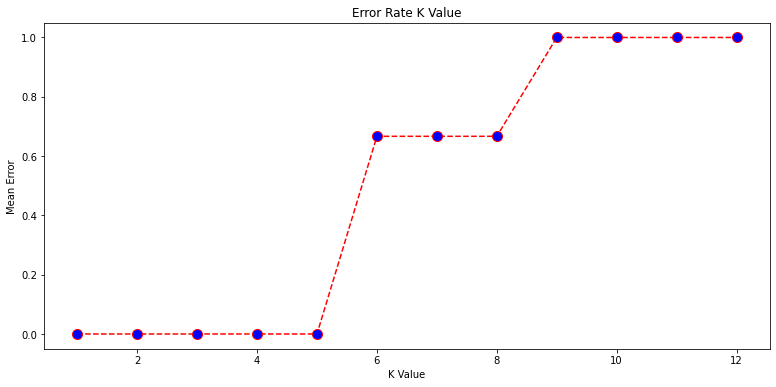

In [15]:
plt.figure(figsize=(13, 6))
plt.plot(range(1, 13), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')